### Let's try transfer learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

In [3]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [10]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [13]:
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (3,3), strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
__________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 83s - loss: 0.2722 - acc: 0.9157 - val_loss: 0.0756 - val_acc: 0.9777
Epoch 2/10
48000/48000 [==============================] - 82s - loss: 0.0878 - acc: 0.9721 - val_loss: 0.0492 - val_acc: 0.9857
Epoch 3/10
48000/48000 [==============================] - 82s - loss: 0.0616 - acc: 0.9809 - val_loss: 0.0414 - val_acc: 0.9878
Epoch 4/10
48000/48000 [==============================] - 82s - loss: 0.0478 - acc: 0.9854 - val_loss: 0.0415 - val_acc: 0.9876
Epoch 5/10
48000/48000 [==============================] - 83s - loss: 0.0412 - acc: 0.9876 - val_loss: 0.0364 - val_acc: 0.9897
Epoch 6/10
48000/48000 [==============================] - 83s - loss: 0.0361 - acc: 0.9884 - val_loss: 0.0393 - val_acc: 0.9880
Epoch 7/10
48000/48000 [==============================] - 82s - loss: 0.0325 - acc: 0.9893 - val_loss: 0.0321 - val_acc: 0.9902
Epoch 8/10
48000/48000 [==============================

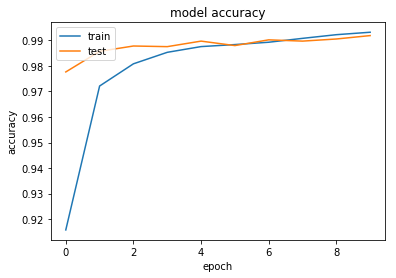

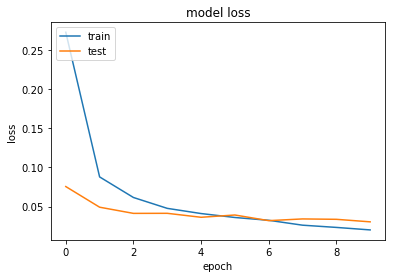

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.save_weights('model.h5')

#### Now load SVHN dataset

In [5]:
train = scipy.io.loadmat('train_32x32.mat')
test  = scipy.io.loadmat('test_32x32.mat')

In [6]:
train['X'] = train['X'][np.newaxis,...]
train_data = np.swapaxes(train['X'],0,4).squeeze()

test['X'] = test['X'][np.newaxis,...]
test_data = np.swapaxes(test['X'],0,4).squeeze()

In [7]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255.0
test_data /= 255.0

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [21]:
X_train = np.zeros((73257, 32, 32))
for i in range(train_data.shape[0]):
    X_train[i] = rgb2gray(train_data[i])

In [10]:
X_test = np.zeros((26032, 32, 32))
for i in range(test_data.shape[0]):
    X_test[i] = rgb2gray(test_data[i])

In [13]:
import cv2

In [22]:
X_train_ = np.zeros((73257, 28, 28))
for i in range(train_data.shape[0]):
    X_train_[i] = cv2.resize(X_train[i],(28,28))

In [50]:
X_test_ = np.zeros((26032, 28, 28))
for i in range(test_data.shape[0]):
    X_test_[i] = cv2.resize(X_test[i],(28,28))

In [51]:
X_train_ = X_train_.reshape(X_train_.shape[0],28, 28, 1)
X_test_ = X_test_.reshape(X_test_.shape[0], 28, 28, 1)

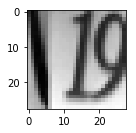

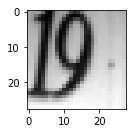

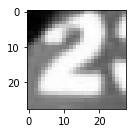

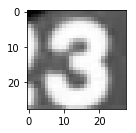

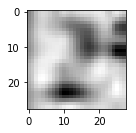

In [32]:
for i in range(5):
    plt.subplot(221)
    plt.imshow(X_train_[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

In [27]:
y_train = keras.utils.to_categorical(train['y'][:,0])[:,1:]
y_test = keras.utils.to_categorical(test['y'][:,0])[:,1:]

In [11]:
# list all the layer names which are in the model.
layer_names = [layer.name for layer in model.layers]

In [12]:
layer_names

['conv2d_1',
 'activation_1',
 'max_pooling2d_1',
 'conv2d_2',
 'activation_2',
 'max_pooling2d_2',
 'dropout_1',
 'flatten_1',
 'dense_1',
 'activation_3',
 'dropout_2',
 'dense_2',
 'activation_4']

In [56]:
model.load_weights('model.h5')

In [58]:
adam = Adam(decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy'])

In [59]:
history = model.fit(X_train_, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/15
58605/58605 [==============================] - 113s - loss: 1.1718 - acc: 0.6221 - val_loss: 0.6393 - val_acc: 0.8136
Epoch 2/15
58605/58605 [==============================] - 112s - loss: 0.6376 - acc: 0.8082 - val_loss: 0.4815 - val_acc: 0.8665
Epoch 3/15
58605/58605 [==============================] - 110s - loss: 0.5346 - acc: 0.8387 - val_loss: 0.4335 - val_acc: 0.8761
Epoch 4/15
58605/58605 [==============================] - 110s - loss: 0.4813 - acc: 0.8551 - val_loss: 0.4059 - val_acc: 0.8825
Epoch 5/15
58605/58605 [==============================] - 111s - loss: 0.4446 - acc: 0.8652 - val_loss: 0.3785 - val_acc: 0.8900
Epoch 6/15
58605/58605 [==============================] - 111s - loss: 0.4083 - acc: 0.8767 - val_loss: 0.3642 - val_acc: 0.8948
Epoch 7/15
58605/58605 [==============================] - 111s - loss: 0.3806 - acc: 0.8838 - val_loss: 0.3490 - val_acc: 0.8974
Epoch 8/15
58605/58605 [=======================

In [60]:
score = model.evaluate(X_test_, y_test, verbose=0)
print('loss:', score[0])
print('Test accuracy:', score[1])


loss: 0.332295299161
Test accuracy: 0.909572833436


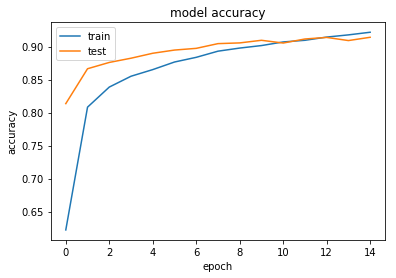

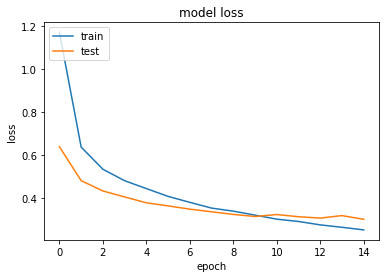

In [61]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()